In [1]:
from skimage.measure import block_reduce
import numpy as np

import logging

from utils import logging as lg
lg.set_logging(logging.ERROR)
from model import provider, heatmap_evaluation
import matplotlib.pyplot as plt



In [2]:
from utils import data_provider

In [3]:
dataset = {
    'mnist': data_provider.MNISTData(dir_path='../data/mnist'),
    'fashion-mnist': data_provider.FashionMNISTData(dir_path='../data/fashion-mnist'),
    'ufi-cropped': data_provider.UFICroppedData(dir_path='../data/ufi-cropped')
}

In [4]:
def model_path(network, dataset, seq):
    return '../final-models/%s_network-%s-seq-%d' % (network, dataset, seq)

In [35]:
def get_data_for_class(data_name, class_idx, no=16, seed=2):
    np.random.seed(seed)

    data = dataset[data_name]
    indices = np.argmax(data.test2d.y, axis=1) == class_idx
    s = np.random.choice(np.sum(indices), size=no, replace=False)
    print(s)
    return data.test2d.x[indices,:,:][s, :, :]

# Plot digit

In [36]:
mnist_1 = get_data_for_class('mnist', 1)

[ 948 1075  542  617  477  200  597  401  945  417  212 1109  439  599  632
  861]


In [37]:
mnist_1.shape

(16, 28, 28)

In [253]:
def plot_digits(data, title="", show_title=False):
    plt.figure(figsize=(16,2))
    for i in range(data.shape[0]):
        plt.subplot(1,16, i+1)
        plt.imshow(data[i,:,:], cmap='Reds')
        plt.xticks([])
        plt.yticks([])
    if show_title:
        plt.suptitle(title)
    plt.show()

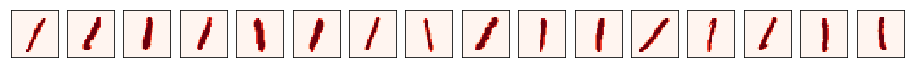

In [254]:
plot_digits(mnist_1, title="MNIST Class 1")

In [192]:
fmnist_1 = get_data_for_class('fashion-mnist', 1)
fmnist_anker_boots = get_data_for_class('fashion-mnist', 9, seed=7)

[ 37 726 846 295 924 658 682 286 880 272 137 954 515 788 860 640]
[778 334 271 802 216 408 812  94 487 170  24 242 542 930 886 426]


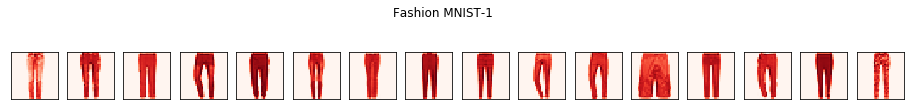

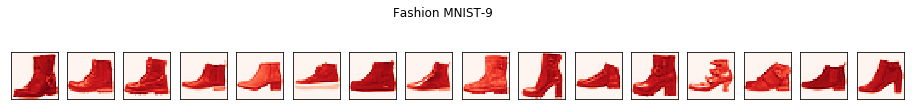

In [219]:
plot_digits(fmnist_1, 'Fashion MNIST-1')
plot_digits(fmnist_anker_boots, 'Fashion MNIST-9')


In [61]:
def plot_rel_lrp(network, seq, dataset_name, data):
    path = model_path(network, dataset_name, seq)
    m = provider.load(path)
    _, heatmaps = m.rel_lrp_deep_taylor(data)
    plot_digits(heatmaps, title=m._.experiment_name)

INFO:tensorflow:Restoring parameters from ../final-models/s2_network-mnist-seq-1/model.ckpt


2017-12-31 23:12:11,432 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s2_network-mnist-seq-1/model.ckpt


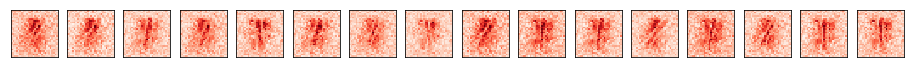

In [255]:
plot_rel_lrp('s2', 1, 'mnist', mnist_1)

INFO:tensorflow:Restoring parameters from ../final-models/s3_network-mnist-seq-1/model.ckpt


2017-12-31 23:12:13,954 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s3_network-mnist-seq-1/model.ckpt


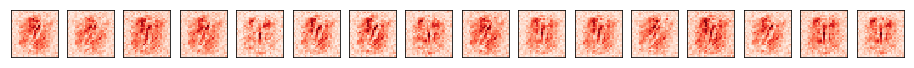

In [256]:
plot_rel_lrp('s3', 1, 'mnist', mnist_1)

INFO:tensorflow:Restoring parameters from ../final-models/deep_4l_network-mnist-seq-1/model.ckpt


2017-12-31 23:12:16,836 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/deep_4l_network-mnist-seq-1/model.ckpt


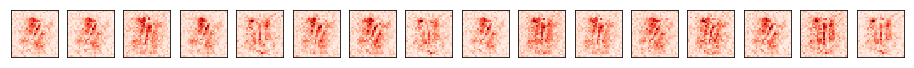

In [257]:
plot_rel_lrp('deep_4l', 1, 'mnist', mnist_1)

INFO:tensorflow:Restoring parameters from ../final-models/convdeep_4l_network-mnist-seq-1/model.ckpt


2017-12-31 23:12:19,776 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/convdeep_4l_network-mnist-seq-1/model.ckpt


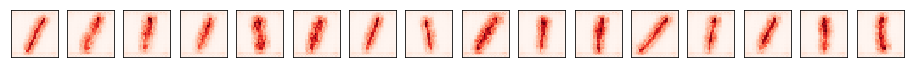

In [258]:
plot_rel_lrp('convdeep_4l', 1, 'mnist', mnist_1)

INFO:tensorflow:Restoring parameters from ../final-models/s2_network-fashion-mnist-seq-14/model.ckpt


2017-12-31 12:40:33,751 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s2_network-fashion-mnist-seq-14/model.ckpt


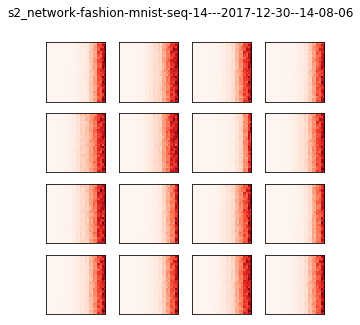

INFO:tensorflow:Restoring parameters from ../final-models/s2_network-fashion-mnist-seq-14/model.ckpt


2017-12-31 12:40:38,719 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s2_network-fashion-mnist-seq-14/model.ckpt


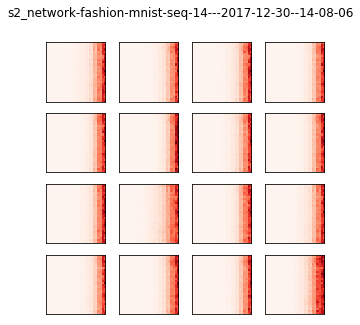

In [194]:
plot_rel_lrp('s2', 14, 'fashion-mnist', fmnist_1)
plot_rel_lrp('s2', 14, 'fashion-mnist', fmnist_anker_boots)

INFO:tensorflow:Restoring parameters from ../final-models/s3_network-fashion-mnist-seq-14/model.ckpt


2017-12-31 12:42:00,652 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s3_network-fashion-mnist-seq-14/model.ckpt


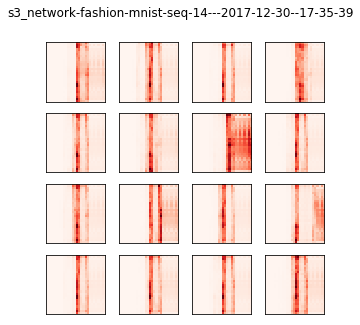

INFO:tensorflow:Restoring parameters from ../final-models/s3_network-fashion-mnist-seq-7/model.ckpt


2017-12-31 12:42:07,203 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s3_network-fashion-mnist-seq-7/model.ckpt


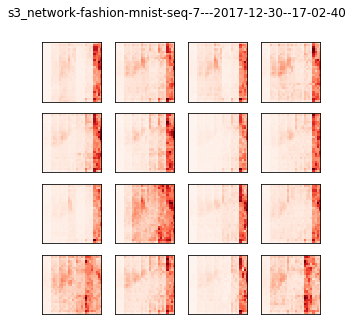

In [198]:
plot_rel_lrp('s3', 14, 'fashion-mnist', fmnist_1)
plot_rel_lrp('s3', 7, 'fashion-mnist', fmnist_anker_boots)

In [248]:
plot_rel_lrp('deep_4l', 14, 'fashion-mnist', fmnist_1)

FileNotFoundError: [Errno 2] No such file or directory: '../final-models/deep_4l_network-fashion-mnist-seq-14/result.yaml'

INFO:tensorflow:Restoring parameters from ../final-models/convdeep_4l_network-fashion-mnist-seq-14/model.ckpt


2017-12-31 12:42:49,260 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/convdeep_4l_network-fashion-mnist-seq-14/model.ckpt


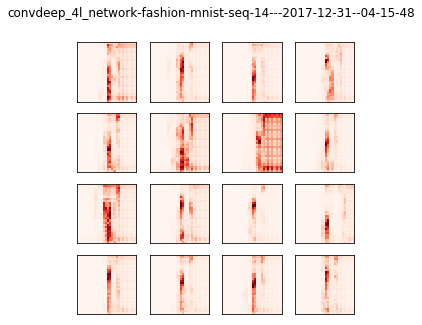

INFO:tensorflow:Restoring parameters from ../final-models/convdeep_4l_network-fashion-mnist-seq-7/model.ckpt


2017-12-31 12:42:56,496 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/convdeep_4l_network-fashion-mnist-seq-7/model.ckpt


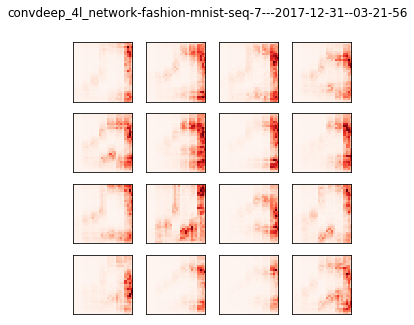

In [199]:
plot_rel_lrp('convdeep_4l', 14, 'fashion-mnist', fmnist_1)
plot_rel_lrp('convdeep_4l', 7, 'fashion-mnist', fmnist_anker_boots)

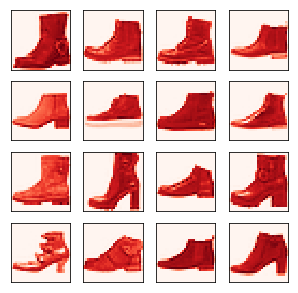

In [201]:
# plot_digits(fmnist_1, 'Fashion MNIST-1')
plot_digits(fmnist_anker_boots, '')

# Plot distribution

In [154]:
def compute_distribution(data, seq):
    dist = np.zeros(seq)

    dmin = np.min(data)
    dmax = np.max(data)
    normalized = (data - dmin)/(dmax-dmin)
    no_cols_feed = int(data.shape[2]/seq)
    xaxis = []
    for i in range(0, data.shape[2], no_cols_feed):
        st, end = i, i+no_cols_feed
        step = int(i/no_cols_feed)

        dist[step] = np.sum(normalized[:, :, st:end])
        
    return dist / np.sum(dist)

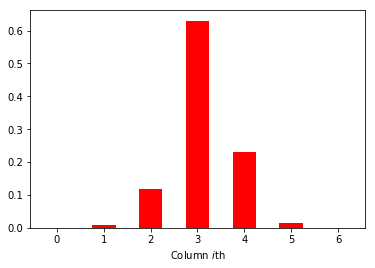

In [133]:
def plot_dist(data, seq, title=""):
    dist = np.zeros(seq)

    dmin = np.min(data)
    dmax = np.max(data)
    normalized = (data - dmin)/(dmax-dmin)
    no_cols_feed = int(data.shape[2]/seq)
    xaxis = []
    for i in range(0, data.shape[2], no_cols_feed):
        st, end = i, i+no_cols_feed
        step = int(i/no_cols_feed)

        dist[step] = np.sum(normalized[:, :, st:end])

        xaxis.append('%d:%d' %(st+1, end))
    plt.bar(range(seq), dist / np.sum(dist), 0.5, color='r')
#     plt.xticks(range(seq), xaxis)
    plt.xlabel('Column $i$th')
    plt.title(title)
    plt.show()
plot_dist(mnist_1, 7)

In [134]:
def plot_rel_dist(network, data, dataset_name, seq):
    path = model_path(network, dataset_name, seq)
    m = provider.load(path)
    _, heatmaps = m.rel_lrp_deep_taylor(data)
    plot_dist(heatmaps, seq, title='Rel Dist of %s' % m._.experiment_name)

INFO:tensorflow:Restoring parameters from ../final-models/s2_network-mnist-seq-7/model.ckpt


2017-12-31 02:03:46,485 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s2_network-mnist-seq-7/model.ckpt


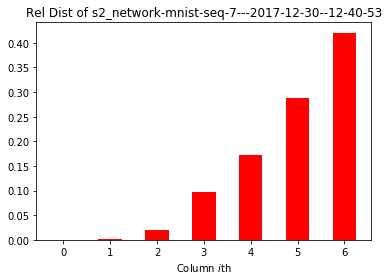

In [135]:
plot_rel_dist('s2', mnist_1, 'mnist', 7)

INFO:tensorflow:Restoring parameters from ../final-models/s3_network-mnist-seq-7/model.ckpt


2017-12-31 02:03:50,139 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s3_network-mnist-seq-7/model.ckpt


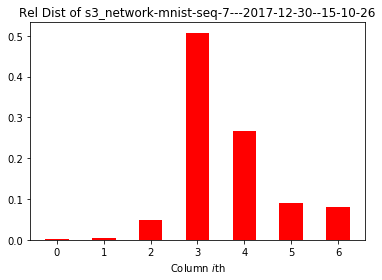

In [136]:
plot_rel_dist('s3', mnist_1, 'mnist', 7)

INFO:tensorflow:Restoring parameters from ../final-models/deep_4l_network-mnist-seq-7/model.ckpt


2017-12-31 02:03:54,899 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/deep_4l_network-mnist-seq-7/model.ckpt


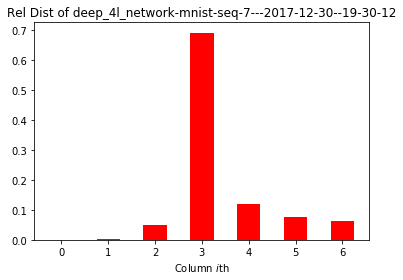

In [137]:
plot_rel_dist('deep_4l', mnist_1, 'mnist', 7)

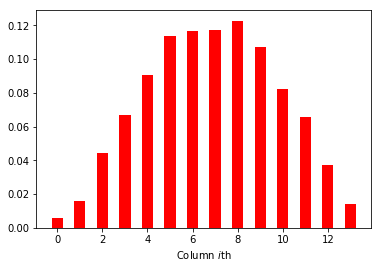

In [138]:
plot_dist(dataset['fashion-mnist'].test2d.x, 14)

In [244]:
def plot_distributions(networks, dataset_name, data, seq, data_label="Data"):
    dist_data = compute_distribution(data, seq)
    plt.plot(dist_data, '--', label=data_label, marker='o')
    for i in networks:
        path = model_path(i, dataset_name, seq)
        m = provider.load(path)
        print(m._.experiment_name)
        _, heatmaps = m.rel_lrp_deep_taylor(data)
        dist_hm = compute_distribution(heatmaps, seq)
        plt.plot(dist_hm, label="%s" % provider.network_nickname(m._.architecture_name), marker='*')
    plt.ylabel('$\%$')
    plt.xlabel('Step $i^{th}$')
    plt.xticks(range(seq), range(1, seq+1))
    plt.legend()
    plt.show()

s2_network-mnist-seq-7---2017-12-30--12-40-53
INFO:tensorflow:Restoring parameters from ../final-models/s2_network-mnist-seq-7/model.ckpt


2017-12-31 22:32:44,218 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s2_network-mnist-seq-7/model.ckpt


s3_network-mnist-seq-7---2017-12-30--15-10-26
INFO:tensorflow:Restoring parameters from ../final-models/s3_network-mnist-seq-7/model.ckpt


2017-12-31 22:32:47,729 | INFO : tf_logging.py(info 82) - Restoring parameters from ../final-models/s3_network-mnist-seq-7/model.ckpt


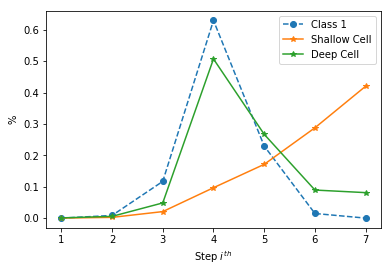

In [247]:
plot_distributions(['s2', 's3'], 'mnist', mnist_1, 7, data_label="Class 1")